In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Read the video and close the video pop-up window when it is done

In [4]:
import cv2
import numpy as np
   
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('210627_152541_012_FH.MP4')
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video  file")
   
# Read until video is completed
while(cap.isOpened()):
      
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
   
    # Display the resulting frame
    cv2.imshow('Frame', frame)
   
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
   
  # Break the loop
  else: 
    break
   
# When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()

### Process videos and convert it to multiple images

In [1]:
import cv2
vidcap = cv2.VideoCapture('210627_152541_012_FH.MP4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

### Data Augmentation

View the sample image

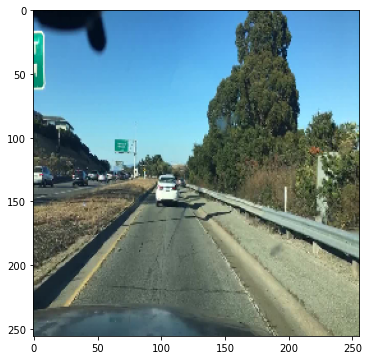

In [61]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

image_path = '.../DataAug_Sample.jpg'

#Loads image in from the set image path
img = keras.preprocessing.image.load_img(image_path, target_size= (256,256))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.
#Plots image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()


Applied rotation, horizontal flip and brightness adjustment to the original images

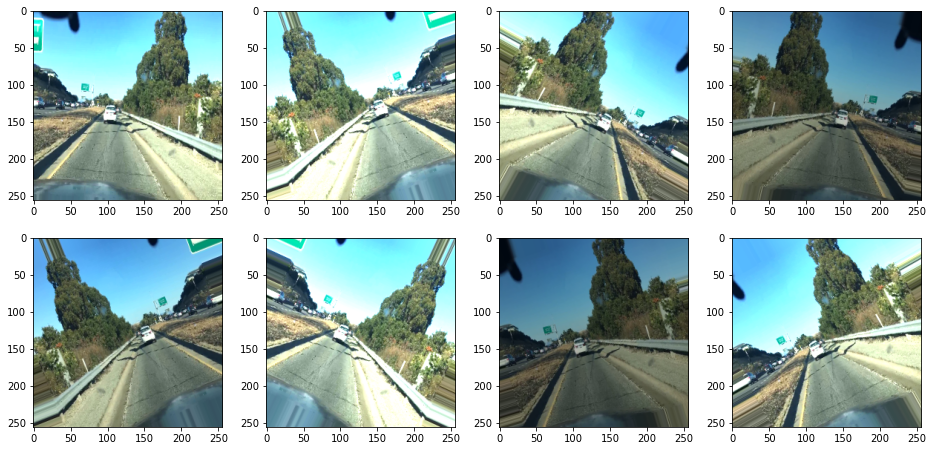

In [59]:
image_path = '.../DataAug_Sample.jpg'

img = keras.preprocessing.image.load_img(image_path, target_size= (256,256))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True,brightness_range=[0.4,1.8])
# less than 1.0 darken the image, values larger than 1.0 brighten the image

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,9):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()